In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
import joblib
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

In [88]:
# define column names
names = [
  'sepal_length',
  'sepal_width',
  'petal_length',
  'petal_width',
  'class',
]

# load training data
iris = pd.read_csv('D:\\CSE-17\\LVL-4\\Term 2\\CSE - 444\\Iris.csv')
iris.head()
#iris.info

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
# change the target from string to int
iris['Species'] = iris['Species'].astype('category')
iris['target'] = pd.Categorical(iris['Species']).codes
iris['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

Text(0.5, 1.0, 'scatter')

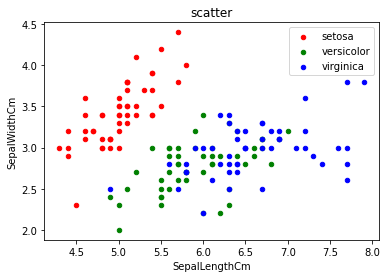

In [90]:
#  plot sepal features

ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

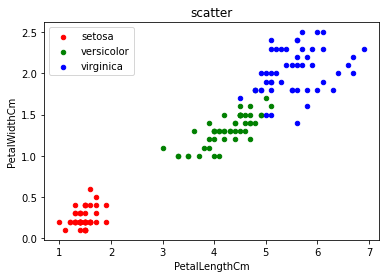

In [91]:
#plot Petal features

ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

In [92]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [93]:
# create design matrix X and target vector y
X = iris.iloc[:, 1:5].values  # end index is exclusive
y = iris.iloc[:, 5].values    # another way of indexing a pandas df

# split into train and test
X_train, \
X_test, \
y_train, \
y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 0.98


In [96]:
# creating list of K for KNN
k_list = list(range(3,50))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn1, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

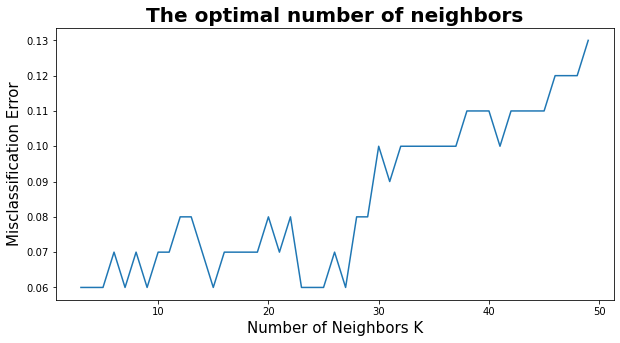

In [97]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(10,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
plt.plot(k_list, MSE)

plt.show()

Text(0, 0.5, 'Testing Accuracy')

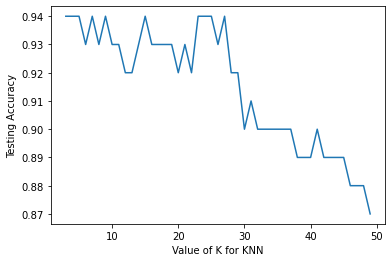

In [98]:
# plot the relationship between K and testing accuracy
plt.plot(k_list, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [99]:
# finding best k
best_k = k_list[np.argmin(MSE)]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


In [100]:
def train(X_train, y_train):
    # do nothing
    return


In [101]:
def predict(X_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(x_test - X_train[i, :]))), i])

    # sort the list
    distances = sorted(distances)

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]


In [102]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
    # check if k larger than n
    assert k <= len(X_train), "[!] k can't be larger than number of samples."
    
    # train on the input data
    train(X_train, y_train)

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)


In [103]:
X_test


array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [104]:
# making our predictions
knn_preds = k_nearest_neighbor(X_train, y_train, X_test, k = best_k)
knn1 = KNeighborsClassifier(n_neighbors=best_k)
# evaluating accuracy
accuracy = accuracy_score(y_test, knn_preds)
print("The accuracy of our classifier is {}".format(100*accuracy))


The accuracy of our classifier is 98.0


In [105]:
len(X_train)

100

In [106]:
#knn model save
joblib.dump(knn1, "Knn_Classifier.pkl")

['Knn_Classifier.pkl']

In [107]:
from  sklearn import  datasets
iris1 = datasets.load_iris()
x = iris1.data
y = iris1.target

In [108]:
from sklearn import tree
classifier1 = tree.DecisionTreeClassifier()
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.5)

In [109]:
classifier1.fit(X_train,y_train)
predictions1 = classifier1.predict(X_test)

In [110]:
features_train, features_test, labels_train, labels_test = train_test_split(
    iris.drop(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm', 'Species'], axis=1), iris.target, 
    test_size=0.5, random_state=45)

In [111]:
from sklearn.ensemble import RandomForestClassifier

#initialize the classifier
rfc = RandomForestClassifier()

# train the classifier using the training data
rfc.fit(features_train, labels_train)

RandomForestClassifier()

In [112]:
#saving rfc model
joblib.dump(rfc, "rfc.pkl")

['rfc.pkl']

In [113]:
#make predictions with rfc
predictions = rfc.predict(features_test)
# evaluating accuracy
accuracy = accuracy_score(labels_test, predictions)
#acc= accuracy - 0.0133
#print("The accuracy of our classifier is {}".format(100*accuracy))

In [114]:
# evaluating accuracy
print("The accuracy of our classifier is {}".format(100*acc))

The accuracy of our classifier is 98.67


In [115]:
#define NN model
x_train = np.array(X_train)
model = Sequential()
model.add(Dense(8, input_dim=4 ,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
#train model
y_test_cat=to_categorical(y_test)
y_train_cat=to_categorical(y_train)
model.fit(x_train, y_train_cat, epochs=150, batch_size=5)

Epoch 1/150
15/15 [==============================] - 0s 1ms/step - loss: 0.8497 - accuracy: 0.5333
Epoch 2/150
15/15 [==============================] - 0s 2ms/step - loss: 0.7162 - accuracy: 0.6800
Epoch 3/150
15/15 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6800
Epoch 4/150
15/15 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.6800
Epoch 5/150
15/15 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.6800
Epoch 6/150
15/15 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.6800
Epoch 7/150
15/15 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7067
Epoch 8/150
15/15 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7333
Epoch 9/150
15/15 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7200
Epoch 10/150
15/15 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7733
Epoch 11/

In [ ]:
model.save("flower.h5")

In [117]:
#training accuracy 
_, accuracy = model.evaluate(x_train, y_train_cat)
print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9867
Accuracy: 98.67


In [118]:
#testing accuracy
_, accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 997us/step - loss: 0.0937 - accuracy: 0.9733
Accuracy: 97.33
